In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import cv2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import stylecloud
from IPython.display import Image

In [21]:
df = pd.read_csv("Greys Apriyani-1000-tweets.csv")
df.head(10)

,Datetime,Tweet ID,Text
0,2021-08-01 11:30:54,1421795572692840453,@firzieidris Aamiin..semoga Tuhan berikan hasi...
1,2021-08-01 08:36:26,1421751663795138561,@CNNIndonesia sayangnya... jd tinggal nunggu g...
2,2021-08-01 07:31:33,1421735334681866242,RT @GWirjawan: First #Olympics semifinal by an...
3,2021-08-01 06:55:28,1421726254080749570,Harapan.... Untuk menyambut hari ulang tahun R...
4,2021-08-01 06:10:23,1421714908786221057,Pasti banyak yang expect gold medal ke Greys/A...
5,2021-08-01 06:06:43,1421713986500714499,RT @phlemzy_king: HISTORY FOR INDONESIA!!!\n\n...
6,2021-08-01 05:49:53,1421709749406502912,"makasih ginting, semoga bsk bisa dapet bronze ..."
7,2021-08-01 02:48:49,1421664186153664521,Greys polli apriyani ini main jam brp ya gaes??
8,2021-08-01 01:36:53,1421646082753261573,RT @BBCIndonesia: Greysia Polii dan Rahayu Apr...
9,2021-07-31 21:37:36,1421585866351251457,"Lolos ke Final Ganda Putri Olimpiade Tokyo, Ap..."


In [22]:
df["Text"][2]

'RT @GWirjawan: First #Olympics semifinal by any Indonesian women’s double pair! \n\nDon’t stop til gold, Greys/Apriyani!\n#Badminton #INA  #To…'

In [23]:
pattern_mention = "(@[a-z]+).*?"
pattern_rt = ".*?(RT ).*?"
mention, rt = [], []
for text in df["Text"]:
    temp = re.findall(pattern_mention, text, re.IGNORECASE)
    mention.append(temp)
    if re.match(pattern_rt, text):
        rt.append(1)
    else:
        rt.append(0)
df["Mention"] = mention
df["RT"] = rt
df.head(10)

,Datetime,Tweet ID,Text,Mention,RT
0,2021-08-01 11:30:54,1421795572692840453,@firzieidris Aamiin..semoga Tuhan berikan hasi...,[@firzieidris],0
1,2021-08-01 08:36:26,1421751663795138561,@CNNIndonesia sayangnya... jd tinggal nunggu g...,[@CNNIndonesia],0
2,2021-08-01 07:31:33,1421735334681866242,RT @GWirjawan: First #Olympics semifinal by an...,[@GWirjawan],1
3,2021-08-01 06:55:28,1421726254080749570,Harapan.... Untuk menyambut hari ulang tahun R...,[],0
4,2021-08-01 06:10:23,1421714908786221057,Pasti banyak yang expect gold medal ke Greys/A...,[],0
5,2021-08-01 06:06:43,1421713986500714499,RT @phlemzy_king: HISTORY FOR INDONESIA!!!\n\n...,"[@phlemzy, @GreysPolii]",1
6,2021-08-01 05:49:53,1421709749406502912,"makasih ginting, semoga bsk bisa dapet bronze ...",[],0
7,2021-08-01 02:48:49,1421664186153664521,Greys polli apriyani ini main jam brp ya gaes??,[],0
8,2021-08-01 01:36:53,1421646082753261573,RT @BBCIndonesia: Greysia Polii dan Rahayu Apr...,[@BBCIndonesia],1
9,2021-07-31 21:37:36,1421585866351251457,"Lolos ke Final Ganda Putri Olimpiade Tokyo, Ap...",[],0


In [75]:
# remove punctuation
clean = []
for text in df["Text"]:
    tokens = word_tokenize(text)
    words = [word for word in tokens if word.isalpha()]
    final = re.sub(".*?(RT ).*?", '', " ".join(words), flags=re.IGNORECASE)
    final = re.sub(" grey | greys | greysia | polii ", ' greyspolii ', final, flags=re.IGNORECASE)
    final = re.sub(" apriyani rahayu | apri | rahayu ", ' apriyani ', final, flags=re.IGNORECASE)
    final = re.sub(" greyspoliiapriyani ", ' greyspolii apriyani ', final, flags=re.IGNORECASE)
    final = re.sub("badmintontalk", '', final, flags=re.IGNORECASE)
    clean.append(final)
df["Text_clean"] = clean
df.head(10)

,Datetime,Tweet ID,Text,Mention,RT,Text_clean
0,2021-08-01 11:30:54,1421795572692840453,@firzieidris Aamiin..semoga Tuhan berikan hasi...,[@firzieidris],0,firzieidris Tuhan berikan hasil yg terbaik nan...
1,2021-08-01 08:36:26,1421751663795138561,@CNNIndonesia sayangnya... jd tinggal nunggu g...,[@CNNIndonesia],0,CNNIndonesia sayangnya jd tinggal nunggu greys...
2,2021-08-01 07:31:33,1421735334681866242,RT @GWirjawan: First #Olympics semifinal by an...,[@GWirjawan],1,GWirjawan First Olympics semifinal by any Indo...
3,2021-08-01 06:55:28,1421726254080749570,Harapan.... Untuk menyambut hari ulang tahun R...,[],0,Harapan Untuk menyambut hari ulang tahun RI ci...
4,2021-08-01 06:10:23,1421714908786221057,Pasti banyak yang expect gold medal ke Greys/A...,[],0,Pasti banyak yang expect gold medal ke Sama ke...
5,2021-08-01 06:06:43,1421713986500714499,RT @phlemzy_king: HISTORY FOR INDONESIA!!!\n\n...,"[@phlemzy, @GreysPolii]",1,HISTORY FOR INDONESIA GreysPolii apriyani has ...
6,2021-08-01 05:49:53,1421709749406502912,"makasih ginting, semoga bsk bisa dapet bronze ...",[],0,makasih ginting semoga bsk bisa dapet bronze y...
7,2021-08-01 02:48:49,1421664186153664521,Greys polli apriyani ini main jam brp ya gaes??,[],0,Greys polli apriyani ini main jam brp ya gaes
8,2021-08-01 01:36:53,1421646082753261573,RT @BBCIndonesia: Greysia Polii dan Rahayu Apr...,[@BBCIndonesia],1,BBCIndonesia greyspolii Polii dan apriyani Apr...
9,2021-07-31 21:37:36,1421585866351251457,"Lolos ke Final Ganda Putri Olimpiade Tokyo, Ap...",[],0,Lolos ke Final Ganda Putri Olimpiade Tokyo apr...


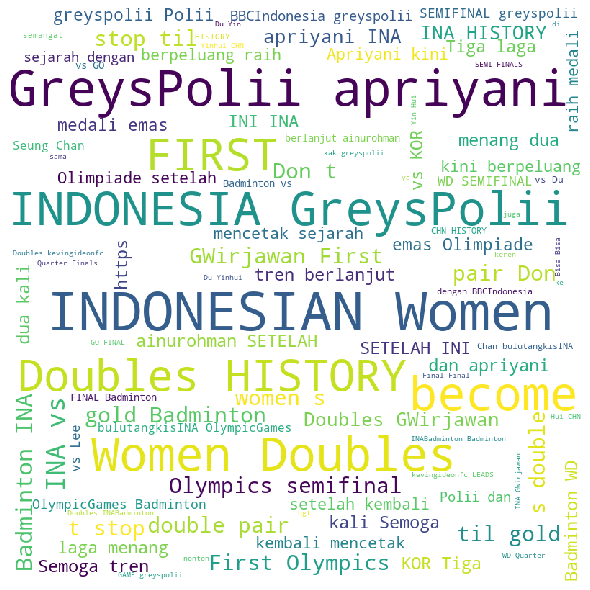

In [76]:
# generate wordcloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(" ".join(clean))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

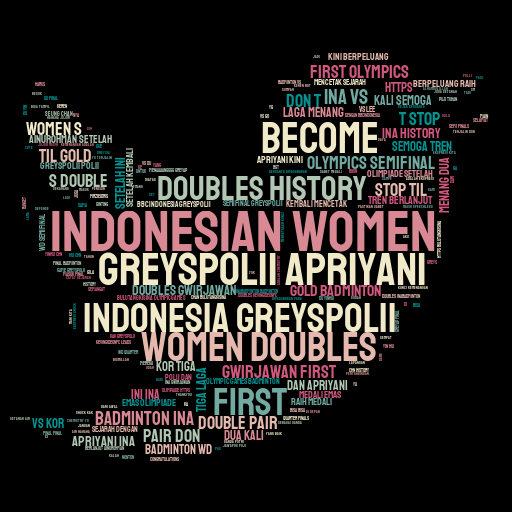

In [77]:
name = "GreyAp-union-rose.png"
stylecloud.gen_stylecloud(text=" ".join(clean).lower(), output_name=name,icon_name= "fab fa-twitter", palette="cartocolors.diverging.TealRose_7", background_color="black")
Image(filename=name)

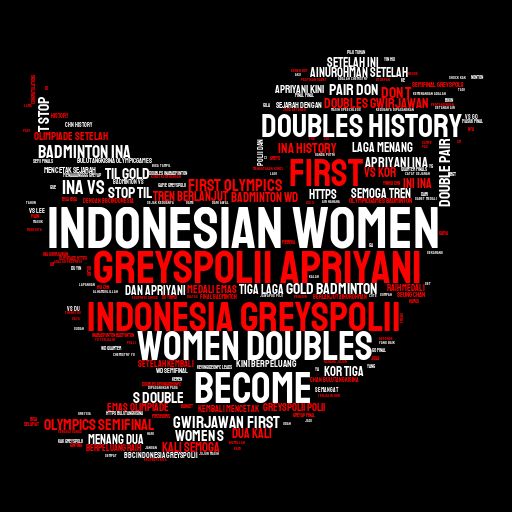

In [90]:
name = "GreyAp-ID.png"
stylecloud.gen_stylecloud(text=" ".join(clean).lower(), output_name=name,icon_name= "fab fa-twitter", colors=["red", "white"], background_color="black")
Image(filename=name) 

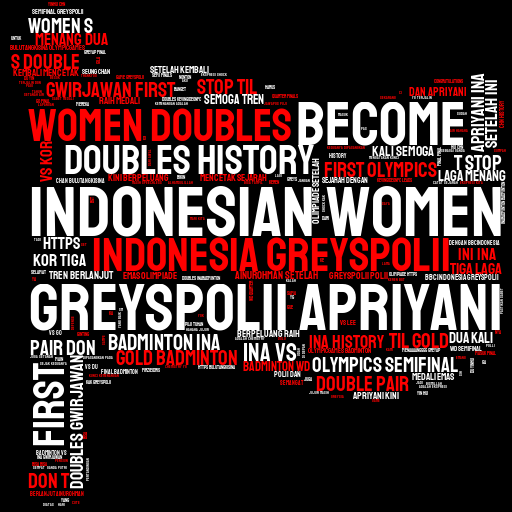

In [79]:
name = "GreyAp-union-IDflag.png"
stylecloud.gen_stylecloud(text=" ".join(clean).lower(), output_name=name,icon_name= "fas fa-flag", colors=["red", "white"], background_color="black")
Image(filename=name) 

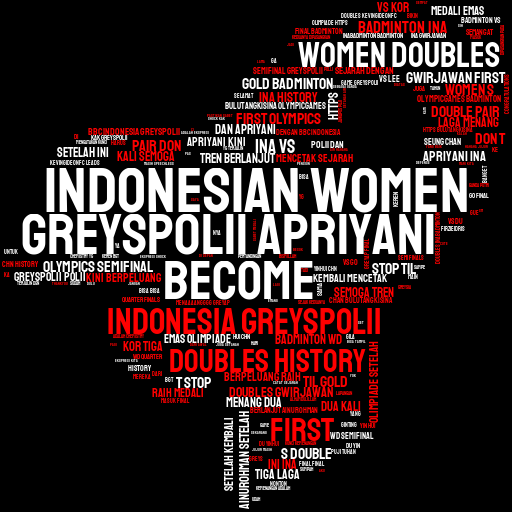

In [89]:
name = "GreyAp-ID-rocket.png"
stylecloud.gen_stylecloud(text=" ".join(clean).lower(), output_name=name,icon_name= "fas fa-rocket", colors=["red", "white"], background_color="black")
Image(filename=name) 